# 네이버 얼굴인식 기능

* pillow, requests package 활용

In [1]:
pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.11.7
astropy                       5.1
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkcharts                      0.2
bla

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
import requests
import json
# matplotlib.patches : image에 박스나 원등의 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches

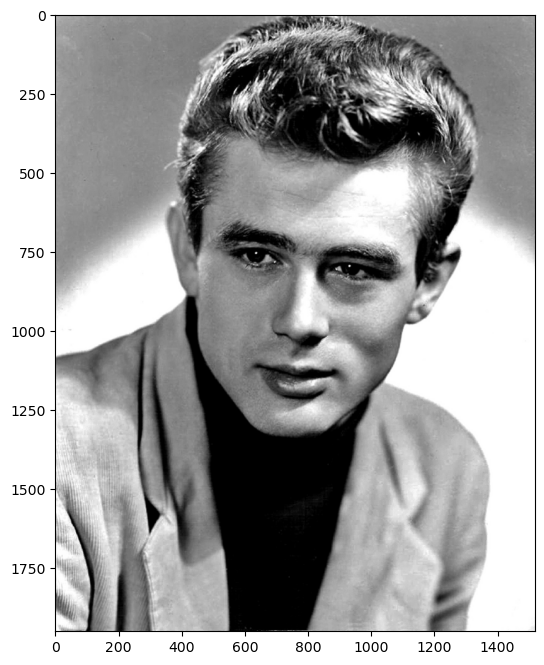

In [4]:
img = mpimg.imread('./data/face_detection_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [5]:
client_id = 'REP1TZBeRylwIL5uzjqy'
client_secret = 'aXWw3fsfEF'

# celebrity(유명인)에서 검색

* image size는 2M 미만만 됨
* image와 비슷한 것을 찾아내어 결과를 json으로 반환

In [6]:
# post를 사용하여 보냄
url = "https://openapi.naver.com/v1/vision/celebrity"
files = {'image': open('./data/face_detection_test_01.jpg','rb')}
headers = {'X-Naver-Client-id': client_id, 'X-Naver-Client-Secret': client_secret}

response = requests.post(url, files=files, headers=headers)

rescode = response.status_code
if(rescode==200):
    print(response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":1518,"height":1950},"faceCount":1},"faces":[{"celebrity":{"value":"정우성","confidence":0.278567}}]}


In [7]:
import json

In [8]:
# json -> obj로 serialize 
parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

# indent : 들여쓰기
# ensure_ascii=False : utf-8로 인코딩된 한글을 제대로 표현해 줌

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "정우성",
                "confidence": 0.278567
            }
        }
    ]
}


* faceCount: 찾은 결과 수
* confidence: 신뢰

# face에서 검색

In [9]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_01.jpg','rb')}
headers = {'X-Naver-Client-id': client_id, 'X-Naver-Client-Secret': client_secret}

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1518,
            "height": 1950
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 467,
                "y": 617,
                "width": 678,
                "height": 678
            },
            "landmark": {
                "leftEye": {
                    "x": 634,
                    "y": 746
                },
                "rightEye": {
                    "x": 952,
                    "y": 797
                },
                "nose": {
                    "x": 760,
                    "y": 981
                },
                "leftMouth": {
                    "x": 625,
                    "y": 1105
                },
                "rightMouth": {
                    "x": 902,
                    "y": 1133
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999999
            },
       

* 99% male, 16% 26~30 age,..

* roi: region of interest, 얼굴의 위치
* emotion: 감정
* pose: 각도, 자세

# dict 형

In [10]:
dict_sample = {'Name': 'pinkwink', 'Age': 'None', 'Class': ['beginner', 'blog']}
dict_sample

{'Name': 'pinkwink', 'Age': 'None', 'Class': ['beginner', 'blog']}

In [11]:
# key 값
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [12]:
# value 값
dict_sample.values()

dict_values(['pinkwink', 'None', ['beginner', 'blog']])

In [13]:
# key 의 value 값
dict_sample['Class']

['beginner', 'blog']

In [14]:
# key 의 value 값
dict_sample.get('Name')

'pinkwink'

In [15]:
# key의 value 값이 있으면 value, 없으면 nothing
dict_sample.get('Age', 'nothing')

'None'

In [16]:
dict_sample.get('room', 'nothing')

'nothing'

# json

In [17]:
import json

In [18]:
customer = {
    'id': '0001',
    'name': 'john',
    'history': [
               {'date': '2023-01-01', 'log': True},
               {'date': '2023-01-02', 'log': False}
           ]
}

In [19]:
json_test = json.dumps(customer, indent=4, ensure_ascii=False)
print(json_test)

{
    "id": "0001",
    "name": "john",
    "history": [
        {
            "date": "2023-01-01",
            "log": true
        },
        {
            "date": "2023-01-02",
            "log": false
        }
    ]
}


# 인식된 얼굴 사진에 정보 표시하기

In [20]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_01.jpg','rb')}
headers = {'X-Naver-Client-id': client_id, 'X-Naver-Client-Secret': client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [21]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [22]:
detect_result['faces']

[{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
  'landmark': {'leftEye': {'x': 634, 'y': 746},
   'rightEye': {'x': 952, 'y': 797},
   'nose': {'x': 760, 'y': 981},
   'leftMouth': {'x': 625, 'y': 1105},
   'rightMouth': {'x': 902, 'y': 1133}},
  'gender': {'value': 'male', 'confidence': 0.999999},
  'age': {'value': '26~30', 'confidence': 0.160886},
  'emotion': {'value': 'neutral', 'confidence': 0.999995},
  'pose': {'value': 'frontal_face', 'confidence': 0.995792}}]

In [23]:
detect_result['faces'][0]

{'roi': {'x': 467, 'y': 617, 'width': 678, 'height': 678},
 'landmark': {'leftEye': {'x': 634, 'y': 746},
  'rightEye': {'x': 952, 'y': 797},
  'nose': {'x': 760, 'y': 981},
  'leftMouth': {'x': 625, 'y': 1105},
  'rightMouth': {'x': 902, 'y': 1133}},
 'gender': {'value': 'male', 'confidence': 0.999999},
 'age': {'value': '26~30', 'confidence': 0.160886},
 'emotion': {'value': 'neutral', 'confidence': 0.999995},
 'pose': {'value': 'frontal_face', 'confidence': 0.995792}}

In [24]:
detect_result['faces'][0]['roi']

{'x': 467, 'y': 617, 'width': 678, 'height': 678}

In [25]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999999}

In [26]:
detect_result['faces'][0]['age']

{'value': '26~30', 'confidence': 0.160886}

In [27]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999995}

In [28]:
# 위의 내용을 변수에 담기
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [29]:
# `\` 은 코드 작성시 줄바꿈
annotation = gender + ' : ' + str(gen_confidence) \
+ '\n' + emotion + ' : ' + str(emotion_confidence) \
+ '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.999999
neutral : 0.999995
26~30 : 0.160886


In [30]:
# matplotlib.patches : image에 박스나 원등의 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches

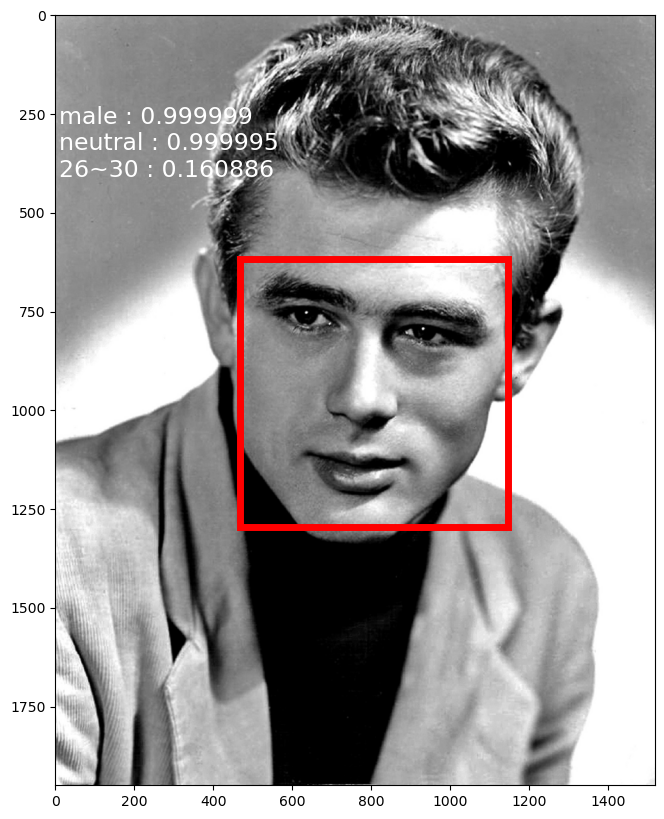

In [31]:
img = mpimg.imread('./data/face_detection_test_01.jpg')

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y), w, h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10, 400, annotation, wrap=True, fontsize=17, color='white')
plt.show()

# edgecolor: 테두리 색, facecolor: 채움 색

# 여러 얼굴이 있는 사진에 대한 정보 표시하기

In [32]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('./data/face_detection_test_02.jpg','rb')}
headers = {'X-Naver-Client-id': client_id, 'X-Naver-Client-Secret': client_secret}

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [33]:
detect_result
# facecount = 3, faces가 3개

{'info': {'size': {'width': 800, 'height': 533}, 'faceCount': 3},
 'faces': [{'roi': {'x': 357, 'y': 192, 'width': 89, 'height': 89},
   'landmark': {'leftEye': {'x': 381, 'y': 220},
    'rightEye': {'x': 418, 'y': 218},
    'nose': {'x': 397, 'y': 234},
    'leftMouth': {'x': 382, 'y': 256},
    'rightMouth': {'x': 418, 'y': 256}},
   'gender': {'value': 'child', 'confidence': 0.999989},
   'age': {'value': '0~3', 'confidence': 0.952179},
   'emotion': {'value': 'laugh', 'confidence': 0.524282},
   'pose': {'value': 'frontal_face', 'confidence': 0.999909}},
  {'roi': {'x': 469, 'y': 155, 'width': 99, 'height': 99},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.964986},
   'age': {'value': '27~31', 'confidence': 0.318949},
   'emotion': {'value': 'talking', 'confidence': 0.807079},
   'pose': {'value': 'left_face', 'confidence': 0.821241}},
  {'roi': {'x': 165, 'y': 134, 'width': 130, 'height': 130},
   'landmark': None,
   'gender': {'value': 'female', 'confide

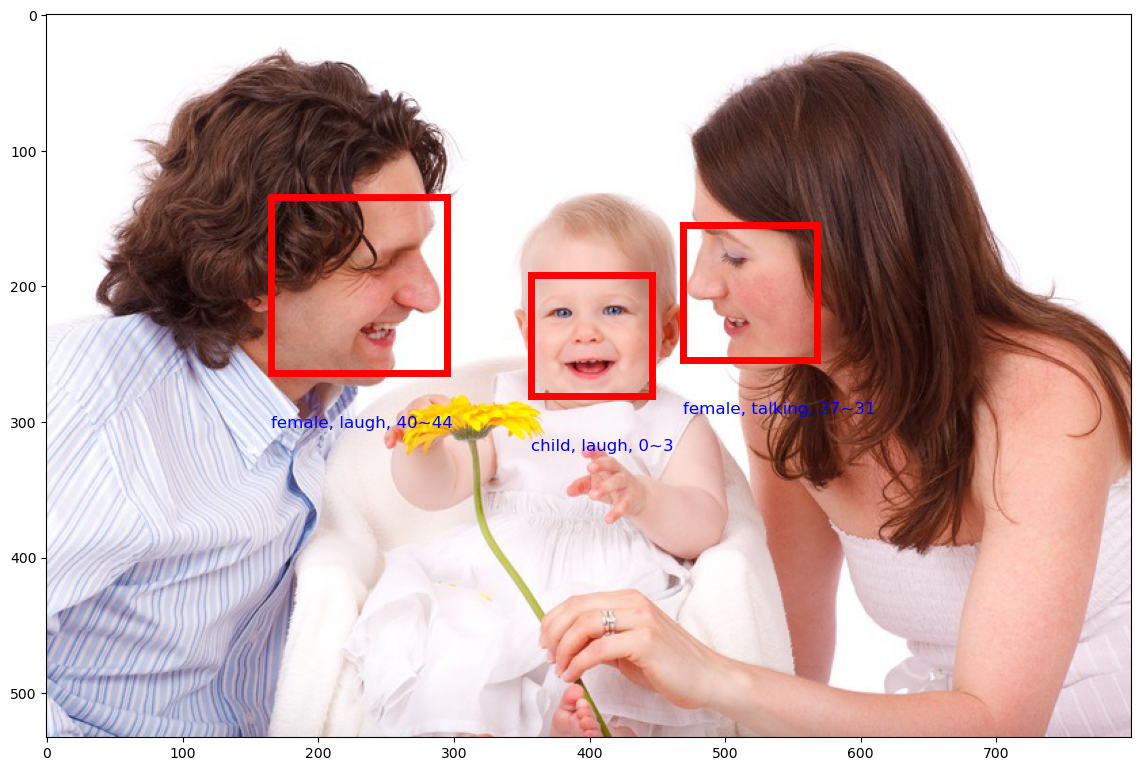

In [34]:
img = mpimg.imread('./data/face_detection_test_02.jpg')

fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y), w, h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
    
    ant_letter = gender + ', ' + emotion + ', ' + age
    plt.text(x, y+h+40, ant_letter, fontsize=12, color='blue')
    ax.add_patch(rect_face)

plt.show()